(ML:tutorial:classification_demo)=
# Supervised learning using PyTorch: a toy example 


## Introduction

In this example, you will use a supervised learning strategy to train a neural network.
The example is deliberately very simple to allow for great scalability and fast CPU learning. 



In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import optimize
import numba
import torch
from IPython.display import YouTubeVideo

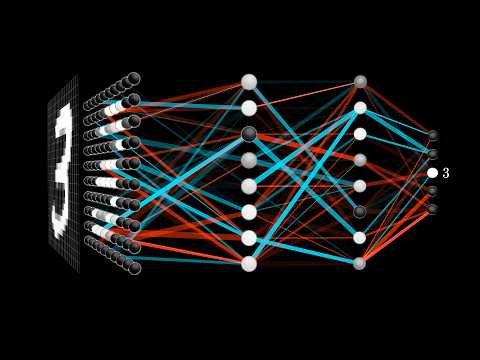

In [2]:
YouTubeVideo("aircAruvnKk")

## Exact model

In this first part, we propose to define an ideal classification model. It is a function which associates a value $z \in \left\lbrace 0, 1 \right \rbrace$ to a tuple of values $(x, y)$. This function represents categories or classes that we would like to model the distribution in space. In a real case, this function would be inaccessible to us and we would try to find it through deep learning.

We propose two examples of functions but you are encouraged to develop your own and to test them.

In [12]:
def func_easy(inp):
    """
    A ideal model.
    """
    xc1, yc1 = 0.3, 0.6
    xc2, yc2 = 0.55, 0.15
    r1, r2 = 0.25, 0.15
    X, Y = np.array(inp).T
    R12 = (X - xc1) ** 2 + (Y - yc1) ** 2
    R22 = (X - xc2) ** 2 + (Y - yc2) ** 2
    return ((R22 <= r2**2) | (R12 <= r1**2)) * 1


def func_hard(inp):
    """
    Another ideal model, just a bit more complex.
    """
    x, y = np.array(inp).T - 0.5
    r = np.sqrt(x**2 + y**2)
    theta = np.arccos(x / r) * np.sign(y)
    out = (np.cos(3 * theta + 10 * r) >= 0.0) * 1
    out[r <= 0.1] = 1
    return out


exact_model = func_easy

In what follows, we draw the model to see what it looks like.

In [13]:
nxm, nym = 200, 200
xm = np.linspace(0, 1.0, nxm)
ym = np.linspace(0, 1.0, nym)
Xm, Ym = np.meshgrid(xm, ym)
pointsm = np.array([Xm.flatten(), Ym.flatten()]).T
solm = exact_model(pointsm)
solm

array([0, 0, 0, ..., 0, 0, 0])

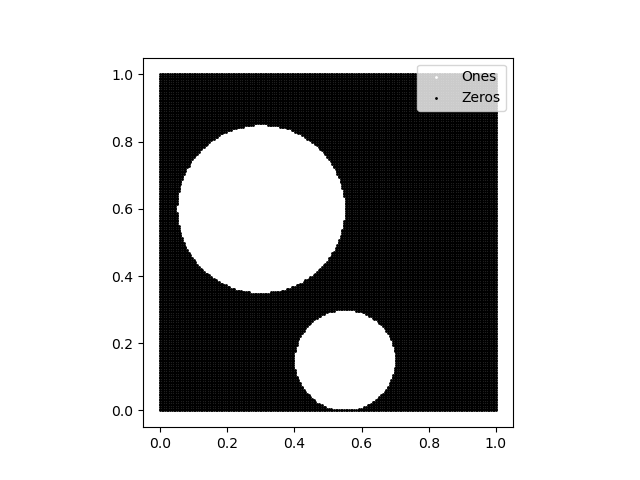

In [14]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
plt.scatter(
    pointsm[solm == 1].T[0], pointsm[solm == 1].T[1], s=1, color="white", label="Ones"
)
plt.scatter(
    pointsm[solm == 0].T[0], pointsm[solm == 0].T[1], s=1, color="black", label="Zeros"
)
plt.legend()
plt.show()

## Learning DB

First, we will create a learning database. This one contains a certain number of points for which we know the class. The goal is to present them to our neural network so that it can learn to recognize the different classes. These points are randomly arranged in the space where the function is defined. We can vary the number of points and see how this affects the learning capacity of the network.


In [15]:
npl = 2000  # NUMBER OF SAMPLES
pointsl = np.random.rand(npl * 2).reshape(npl, 2)
soll = exact_model(pointsl)

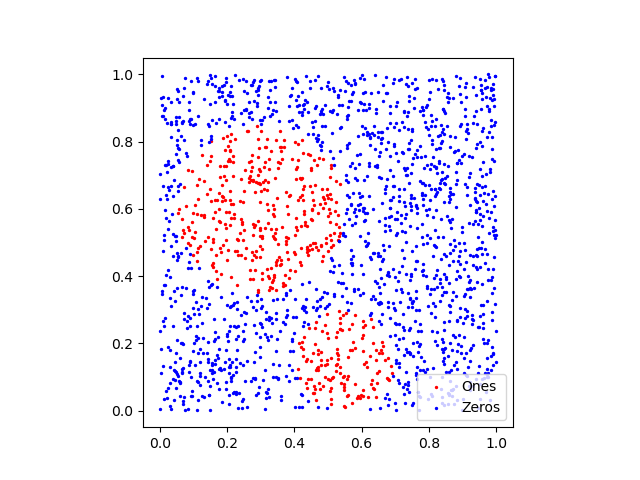

In [16]:
fig, ax = plt.subplots(1, 1)
ax.set_aspect("equal")
plt.scatter(
    pointsl[soll == 1].T[0], pointsl[soll == 1].T[1], s=2, color="red", label="Ones"
)
plt.scatter(
    pointsl[soll == 0].T[0], pointsl[soll == 0].T[1], s=2, color="blue", label="Zeros"
)
plt.legend()
plt.show()

## Neural Network class

A neural network is a stack of alternating layers. Linear layers where a linear (or affine) function is applied to the data and non-linear layers where a non-linear function or activation function (or neural function) is applied to the data. Building a network is therefore a matter of choosing the number of layers and the type of neural functions. The learning process only consists in optimizing the weights present in the linear layers. Neural functions do not usually have adjustable parameters.


![](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

Evaluating the result of the network (inference) is the same as going from left to right, we speak of a forward path. On the contrary, to make it learn in a supervised approach, we have to analyze the effect of the different weights on the result and on the error it generates. This is called a backward path. 

You are asked to create your network and to test it.

## Required work

1. Try the code in the state it is in. Do you think it is effective?

In particular, compare the level of error displayed during learning with the quality of the figure obtained at the end of the notebook. 

2. Try to improve it by playing on: the training dataset, the network structure. Draw conclusions.

3. Try the different neural functions and see how they affect the behavior of the network.

4. Try the `func_hard` function (see above), which has a more difficult structure to reproduce than the default.

In [122]:
device = "cpu"
errors = []
steps = []
# BUILD LAYERS WITH:
# LINEAR LAYERS:
torch.nn.Linear(2, 4, bias=True)  # LINEAR LAYERS
# NEURAL FUNCTIONS:
torch.nn.ELU, torch.nn.ReLU, torch.nn.Hardtanh  # POSSIBLE ACTIVATION FUNCTIONS
activation_func = torch.nn.ReLU

# LAYERS INITIALIZATION
layers = [
    torch.nn.Linear(2, 4, bias=True),
    activation_func(),
    torch.nn.Linear(4, 1, bias=True),
    torch.nn.Hardtanh(min_val=0.0, max_val=1.0),
]
model = torch.nn.Sequential(*layers).to(device)
layers

[Linear(in_features=2, out_features=4, bias=True),
 ReLU(),
 Linear(in_features=4, out_features=1, bias=True),
 Hardtanh(min_val=0.0, max_val=1.0)]

Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220
Error = 17.220


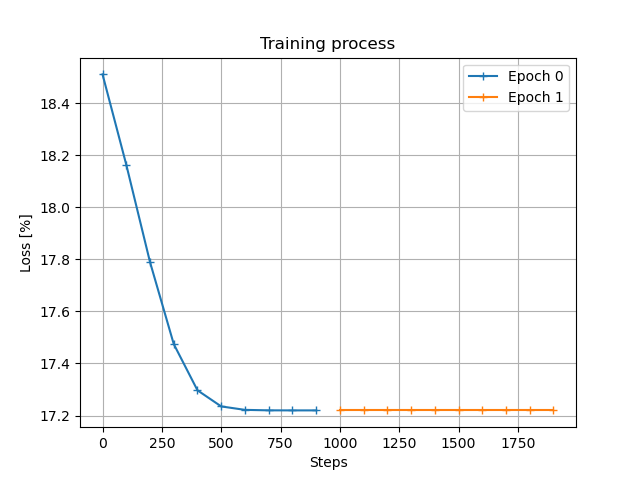

In [ ]:
# TRAINING INPUTS / OUTPUTS
# NOTE: YOU CAN RERUN THIS CELL TO CONTINUE TRAINING PROCESS
run_training = True  # SET TO True TO ACTUALLY RUN TRAINING
if run_training:
    x = torch.Tensor(pointsl).to(device)
    t = torch.Tensor(soll[:, None]).to(device)
    ns = x.shape[0]
    learning_rate = 1e-3
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    loss_fn = torch.nn.MSELoss(reduction="sum").to(device)
    Ne = 10  # Number of training epoch
    Nes = 100  # Number of training steps per epoch
    error = np.zeros(Ne)
    step = np.arange(Ne) * Nes
    if len(steps) != 0:
        step += steps[-1].max() + Nes
    # TRAINING
    for e in range(Ne):
        for s in range(Nes):
            y = model(x)
            loss = loss_fn(y, t)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        error[e] = loss.item() / ns
        err_str = "{0:.3f}".format(error[e] * 100).zfill(6)
        print(f"Loss = {err_str}")
    errors.append(error)
    steps.append(step)

# POST-PROCESSING
if run_training:
    errors2 = np.array(errors)
    fig = plt.figure()
    plt.title("Training process")
    # plt.yscale("log")
    for ep, err in enumerate(errors2):
        plt.plot(steps[ep], err * 100, "x-", label = f"Epoch {ep}")
    plt.xlabel("Steps")
    plt.ylabel("Loss [%]")
    #plt.yscale("log")
    plt.legend()
    plt.grid()

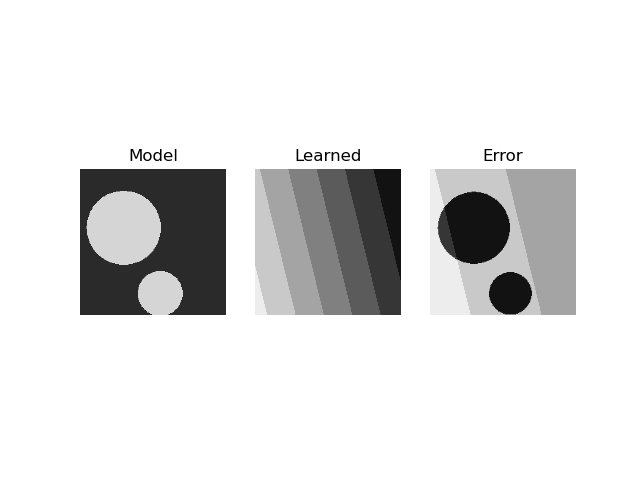

In [125]:
if run_training:
    yt = model(torch.Tensor(pointsm).to(device)).cpu().data.numpy().ravel()
    fig = plt.figure()
    ax = fig.add_subplot(1, 3, 1)
    ax.set_aspect("equal")
    plt.title("Model")
    plt.tricontourf(pointsm.T[0], pointsm.T[1], solm, 2, cmap=mpl.cm.gray)
    ax.axis("off")
    ax = fig.add_subplot(1, 3, 2)
    ax.set_aspect("equal")
    plt.title("Learned")
    plt.tricontourf(pointsm.T[0], pointsm.T[1], yt, cmap=mpl.cm.gray)
    ax.axis("off")
    ax = fig.add_subplot(1, 3, 3)
    ax.set_aspect("equal")
    plt.title("Error")
    plt.tricontourf(pointsm.T[0], pointsm.T[1], yt - solm, cmap=mpl.cm.gray)
    ax.axis("off")
    plt.show()